In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
plt.style.use('ggplot')

# Part 1: four plots

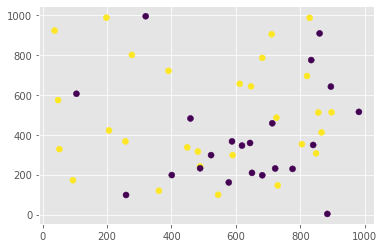

In [5]:
# 1
a = np.random.randint(1000, size=50)
b = np.random.randint(1000, size=50)

c = (a+b)%2 == 0

plt.scatter(a,b,c=c)

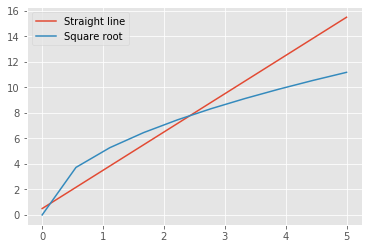

In [6]:
# 2
x  = np.linspace(0,5,10)
y1 = 3*x+0.5
y2 = 5*np.sqrt(x)

fig, ax = plt.subplots()
ax.plot(x,y1, label='Straight line')
ax.plot(x,y2, label='Square root')
ax.legend()

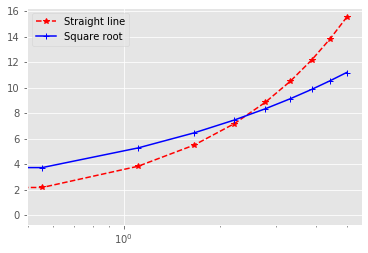

In [7]:
fig, ax = plt.subplots()
ax.plot(x,y1, 'r--*',label='Straight line')
ax.plot(x,y2, 'b-+',label='Square root')
ax.legend()
ax.set_xscale('log')

[Text(0, 0, 'grapes'), Text(0, 0, 'oranges'), Text(0, 0, 'hockey pucks')]

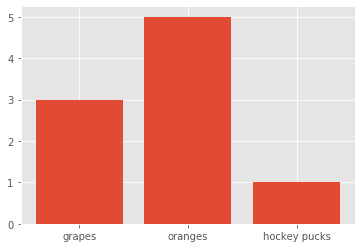

In [8]:
# 3
barheights = [3,5,1]
barlabels = ['grapes', 'oranges', 'hockey pucks']
fig, ax = plt.subplots()
ax.bar(np.arange(len(barheights)), barheights)
x_pos = np.arange(len(barheights))
ax.set_xticks(x_pos)
ax.set_xticklabels(barlabels, rotation=0)

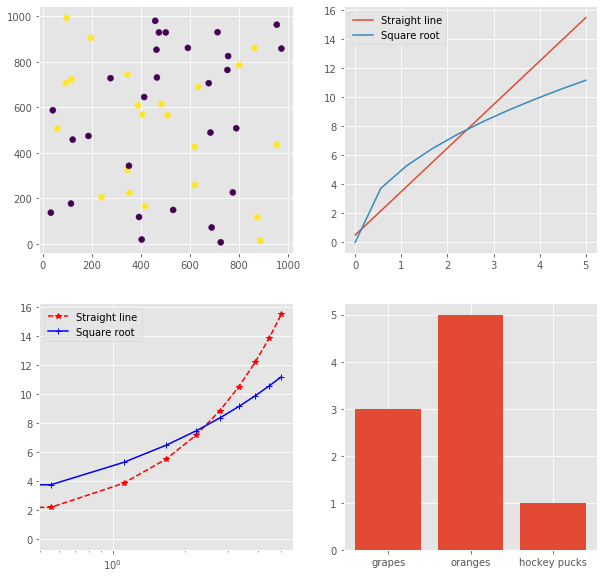

In [9]:
fig, axs = plt.subplots(2,2, figsize=(10,10))
# Fig 1
a = np.random.randint(1000, size=50)
b = np.random.randint(1000, size=50)
c = (a+b)%2 == 0

axs[0, 0].scatter(a,b,c=c)

                   
# Fig 2                      
x  = np.linspace(0,5,10)
y1 = 3*x+0.5
y2 = 5*np.sqrt(x)
                      
axs[0,1].plot(x,y1, label='Straight line')
axs[0,1].plot(x,y2, label='Square root')
axs[0,1].legend()

# Fig3
axs[1,0].plot(x,y1, 'r--*',label='Straight line')
axs[1,0].plot(x,y2, 'b-+',label='Square root')
axs[1,0].legend()
axs[1,0].set_xscale('log')

# Fig 4
barheights = [3,5,1]
barlabels = ['grapes', 'oranges', 'hockey pucks']
axs[1,1].bar(np.arange(len(barheights)), barheights)
x_pos = np.arange(len(barheights))
axs[1,1].set_xticks(x_pos)
axs[1,1].set_xticklabels(barlabels, rotation=0)
plt.savefig('four_plots.png');

#  Part 2: Bike Share Data 

In [27]:
df_weather  = pd.read_csv('data/bay_area_bikeshare/201402_weather_data_v2.csv', parse_dates=['date'], index_col='date')
df_weather.head()

,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dewpoint_f,max_humidity,mean_humidity,min_humidity,max_sea_level_pressure_in,...,mean_visibility_miles,min_visibility_miles,max_wind_speed_m_p_h,mean_wind_speed_m_p_h,max_gust_speed_m_p_h,precipitation_in,cloud_cover,events,wind_dir_degrees,zip
date,,,,,,,,,,,,,,,,,,,,,
2013-08-29,74,68,61,61,58,56,93,75,57,30.07,...,10,10,23,11,28.0,0,4,NaN,286,94107
2013-08-30,78,69,60,61,58,56,90,70,50,30.05,...,10,7,29,13,35.0,0,2,NaN,291,94107
2013-08-31,71,64,57,57,56,54,93,75,57,30.00,...,10,10,26,15,31.0,0,4,NaN,284,94107
2013-09-01,74,66,58,60,56,53,87,68,49,29.96,...,10,10,25,13,29.0,0,4,NaN,284,94107
2013-09-02,75,69,62,61,60,58,93,77,61,29.97,...,10,6,23,12,30.0,0,6,NaN,277,94107


In [15]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 24 columns):
date                          920 non-null object
max_temperature_f             920 non-null int64
mean_temperature_f            920 non-null int64
min_temperature_f             920 non-null int64
max_dew_point_f               920 non-null int64
mean_dew_point_f              920 non-null int64
min_dewpoint_f                920 non-null int64
max_humidity                  920 non-null int64
mean_humidity                 920 non-null int64
min_humidity                  920 non-null int64
max_sea_level_pressure_in     920 non-null float64
mean_sea_level_pressure_in    920 non-null float64
min_sea_level_pressure_in     920 non-null float64
max_visibility_miles          920 non-null int64
mean_visibility_miles         920 non-null int64
min_visibility_miles          920 non-null int64
max_wind_speed_m_p_h          920 non-null int64
mean_wind_speed_m_p_h         920 non-null int64
max_gu

In [22]:
# Get subset columns
cols = df_weather.columns.values[[2, 5, 8, 11, 14, 17]]
cols

array(['mean_temperature_f', 'mean_dew_point_f', 'mean_humidity',
       'mean_sea_level_pressure_in', 'mean_visibility_miles',
       'mean_wind_speed_m_p_h'], dtype=object)

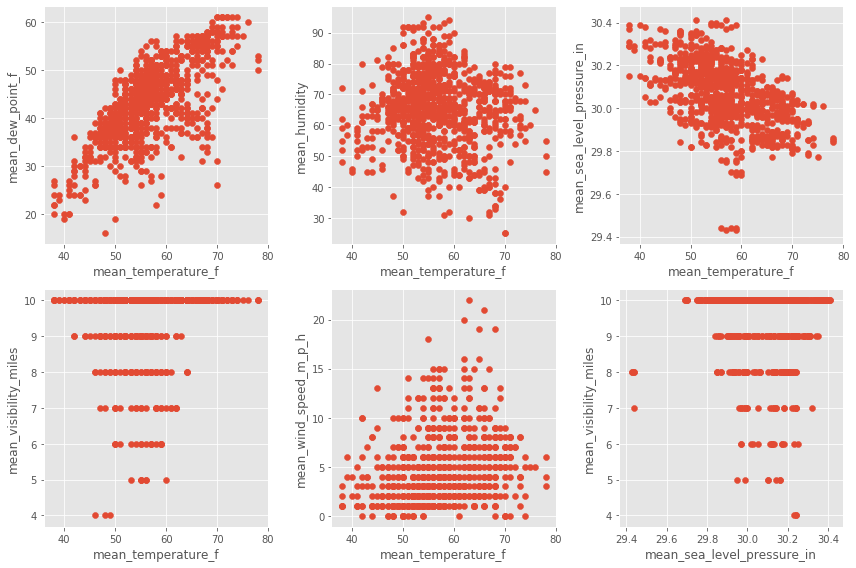

In [40]:
# Get pair for the scatterplots
vars_pair = [(cols[0], cols[1]),
             (cols[0], cols[2]),
             (cols[0], cols[3]),
             (cols[0], cols[4]),
             (cols[0], cols[5]),
             (cols[3], cols[4])]

fig, axs = plt.subplots(2,3, figsize=(12,8))
for i, ax in enumerate(axs.flatten()):
    xlab = vars_pair[i][0]
    ylab = vars_pair[i][1]
    
    x = df_weather[xlab]
    y = df_weather[ylab]
    
    ax.scatter(x, y)
    ax.set_xlabel(xlab)
    ax.set_ylabel(ylab)

plt.tight_layout()

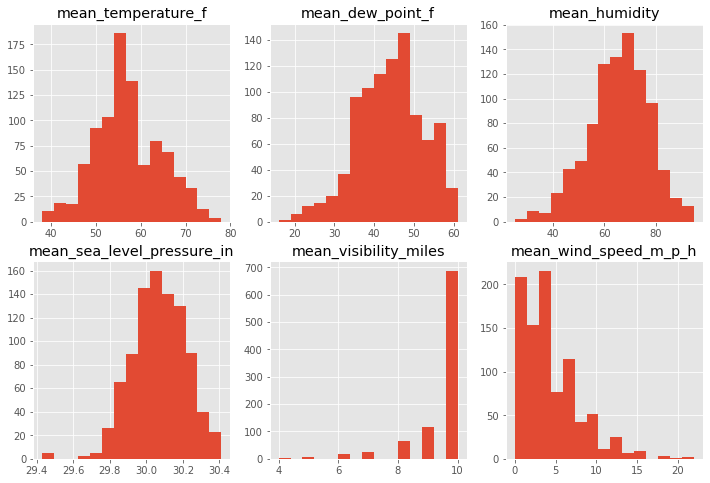

In [42]:
# Plot vs time
fig, axs = plt.subplots(2,3, figsize=(12,8))
for i, ax in enumerate(axs.flatten()):
    df_weather[cols[i]].hist(bins=15, ax=ax)
    ax.set_title(cols[i])

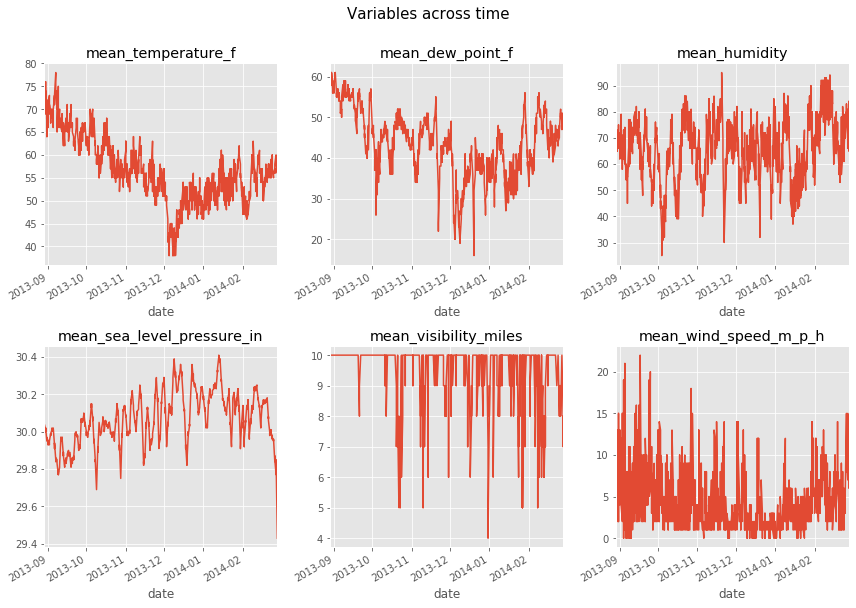

In [35]:
# Plot vs time
fig, axs = plt.subplots(2,3, figsize=(12,8))
for i, ax in enumerate(axs.flatten()):
    df_weather[cols[i]].plot(ax=ax)
    ax.set_title(cols[i])
    
plt.tight_layout()
plt.suptitle('Variables across time', y=1.05, fontsize=15);

# Part 3: Explore

In [44]:
trip_df    = pd.read_csv('data/bay_area_bikeshare/201402_trip_data_v2.csv')
station_df = pd.read_csv('data/bay_area_bikeshare/201402_station_data_v2.csv')

In [45]:
trip_df.head()

,trip_id,duration,start_date,start_station,start_terminal,end_date,end_station,end_terminal,bike_#,subscription_type,zip_code
0,4576,63,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127
1,4607,70,8/29/2013 14:42,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,95138
2,4130,71,8/29/2013 10:16,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,97214
3,4251,77,8/29/2013 11:29,San Jose City Hall,10,8/29/2013 11:30,San Jose City Hall,10,26,Subscriber,95060
4,4299,83,8/29/2013 12:02,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,94103


In [46]:
station_df.head()

,station_id,name,lat,long,dockcount,landmark,installation
0,2,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,8/6/2013
1,3,San Jose Civic Center,37.330698,-121.888979,15,San Jose,8/5/2013
2,4,Santa Clara at Almaden,37.333988,-121.894902,11,San Jose,8/6/2013
3,5,Adobe on Almaden,37.331415,-121.893200,19,San Jose,8/5/2013
4,6,San Pedro Square,37.336721,-121.894074,15,San Jose,8/7/2013


### duration in trips df

In [85]:
print(trip_df['duration'].mean())
print(trip_df['duration'].median())


1230.9101413047251
531.0


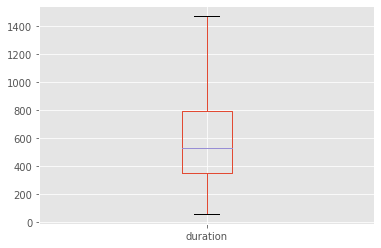

In [68]:
trip_df['duration'].plot(kind='box', showfliers=False)

The trip duration is a heavily right-skewed variable and has a lot of outlier values. Most of users ride the bike between 300 seconds (5 minutes) and 800 seconds (almost 13 minutes). However, there are some users that take longer than 1500 seconds (25 minutes) to finish their ride. The median value for the trip duration is 531 seconds (almost 9 minutes).

### Number of docks per station

15    33
19    18
23     9
27     4
11     4
25     1
Name: dockcount, dtype: int64

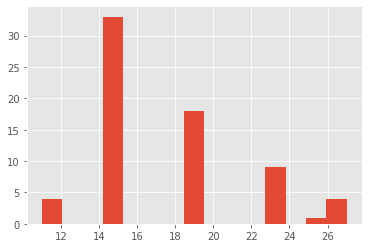

In [63]:
station_df['dockcount'].hist(bins=15)
station_df['dockcount'].value_counts()

Most stations have between 15 and 19 docks to store the bikes. Therefore, it is important to know the demand at each station in order to have enough bikes available to rent to incoming users and enough empty spaces to recieve the users who rented in other stations.

### Start vs end terminals

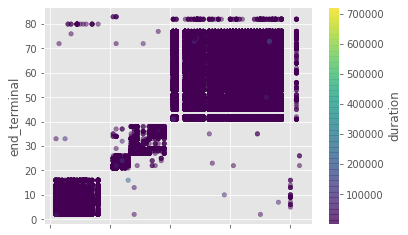

In [86]:
trip_df.plot(kind='scatter', x='start_terminal', y='end_terminal', c='duration', cmap='viridis', alpha=0.5)

Most trips seem to be for short distances, because the trips start and end in nearby stations most of the time. This agrees with the median of trip duration being 9 minutes. 
There are some people that use the bikes to travel larger distances and therefore have longer trips. The vast majority of the trips last less than 100,000 seconds, that is, most users use the bike at most 1 whole day.

### Location of the station

In [77]:
station_df['landmark'].value_counts()

San Francisco    35
San Jose         15
Mountain View     7
Redwood City      7
Palo Alto         5
Name: landmark, dtype: int64

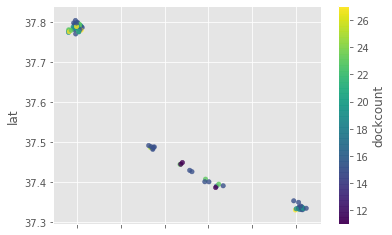

In [88]:
station_df.plot(kind='scatter', x='long', y='lat', c='dockcount', cmap='viridis', alpha=0.8)

The stations with more docks are located in the city with most stations (which is San Francisco). This is consistent because one would expect to find bigger stations in bigger cities. 